In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import treecorr
import healpy as hp
import os

from importlib import reload

import somoclu

import time

start_time = time.time()

import sys
sys.path.append('src')

In [2]:
GETBACK=sys.path

In [3]:
current_path = os.getcwd()  # Obtiene el directorio actual
parent_path = os.path.dirname(current_path)  # Sube un nivel
os.chdir(parent_path)  # Cambia al directorio padre
sys.path = os.getcwd()

In [4]:
GETBACK2=sys.path

In [5]:
catwo = pd.read_parquet("property_maps_desy3_small.parquet.gzip")
catwo = catwo.drop(['HPIX_4096','FOREGROUND_MASK','BADREGIONS_MASK','EBV_SFD98'], axis=1)
catwo = catwo.iloc[0:0]

In [6]:
sys.path=GETBACK2
os.chdir("Modulos")

In [7]:
MainArray = np.loadtxt("Main_Parmeters.txt")

In [8]:
som_dim = int(MainArray[0])
JoyDiv=int(MainArray[1])
dif=int(MainArray[2])
JD=int(MainArray[3])
SJ=int(MainArray[4])
Bin=0

del MainArray

In [9]:
cat = pd.read_parquet("property_maps_desy3PIX.parquet.gzip")

In [10]:
cat_indexed = cat.set_index("HPIX_4096")

def obtener_grupo(region, group):
    try:
        return float(cat_indexed.at[region, group])
    except KeyError:
        return "No encontrado"

In [11]:
Techile = []
for i in range(SJ-1):
    Techile = np.append(Techile, round((100/SJ)*(i+1), 2))

In [12]:
current_path = os.getcwd()  # Obtiene el directorio actual
parent_path = os.path.dirname(current_path)  # Sube un nivel
os.chdir(parent_path)  # Cambia al directorio padre
sys.path = os.getcwd()

In [13]:
redmagic_df = pd.read_parquet("redmagic_Y3.parquet.gzip_rlkey=7wg8hdbgtcgddhjoreof90qau&st=nsegadxa&dl=0")

In [14]:
NN=pd.DataFrame()
MagicianRed=redmagic_df.loc[redmagic_df['bin_id']==Bin].copy()
MagicianRed=MagicianRed[MagicianRed['weight']!=0]

#terciles = np.digitize(MagicianRed['mag_i'], np.percentile(MagicianRed['mag_i'], [33.33, 66.67]), right=True)
terciles = np.digitize(MagicianRed['mag_i'], np.percentile(MagicianRed['mag_i'], Techile), right=True)
MagicianRed['Terciles']=terciles


for i in catwo.columns:
    if i!='HPIX_4096' and i!='Pixel_SOM' and i!='Group':
        print(i,end='')
        Region=np.array([obtener_grupo(Val,i) for Val in MagicianRed.HPIX_4096])
        NN[i] = Region
        print(' loaded.')

print('Pixel_SOM',end='')
Region=np.array([obtener_grupo(Val,'Pixel_SOM') for Val in MagicianRed.HPIX_4096])
MagicianRed['Pixel_SOM'] = Region
print(' loaded.')
print('Group',end='')
Region=np.array([obtener_grupo(Val,'Group') for Val in MagicianRed.HPIX_4096])
MagicianRed['Group'] = Region
print(' loaded.')

Dens = cat.groupby('Group').size().reindex(range(JoyDiv), fill_value=0).values
print((Dens))

del cat

DEPTH_MOF_G loaded.
DEPTH_MOF_I loaded.
DEPTH_MOF_R loaded.
DEPTH_MOF_Z loaded.
EBV_PLANCK13 loaded.
FWHM_WMEAN_G loaded.
SKYVAR_UNCERTAINTY_G loaded.
EXPTIME_SUM_G loaded.
AIRMASS_WMEAN_G loaded.
FWHM_WMEAN_I loaded.
SKYVAR_UNCERTAINTY_I loaded.
EXPTIME_SUM_I loaded.
AIRMASS_WMEAN_I loaded.
FWHM_WMEAN_R loaded.
SKYVAR_UNCERTAINTY_R loaded.
EXPTIME_SUM_R loaded.
AIRMASS_WMEAN_R loaded.
FWHM_WMEAN_Z loaded.
SKYVAR_UNCERTAINTY_Z loaded.
EXPTIME_SUM_Z loaded.
AIRMASS_WMEAN_Z loaded.
NSTAR_GAIA_DR3 loaded.
FRACDET loaded.
Pixel_SOM loaded.
Group loaded.
[ 533182  220354  482862  185887  627963  200733  294546  214724  217432
  862287  237162  857495  105296  787418  366055  328532  129635    8205
  278906   78416  423049 1128574    2684  626073  172165  669529  247767
   86191  151860  395326  155541  585302  159289  271416  937277  210543
  597142   15863   72565  152193    8470  218837    6582  541279  416819
  106047  105398  272688  402509  107793  234289  118871  163693   54821
  2027

In [15]:
sys.path=GETBACK2
os.chdir("Modulos")

In [16]:
cat = pd.read_parquet("property_maps_desy3Groups.parquet.gzip")

In [17]:
cat_indexed = cat.set_index("HPIX_4096")
for i in catwo.columns:
    print('Group_'+i,end='')
    Region=np.array([obtener_grupo(Val,'Group_'+i) for Val in MagicianRed.HPIX_4096])
    MagicianRed['Group_'+i] = Region
    print(' loaded.')

del cat

Group_DEPTH_MOF_G loaded.
Group_DEPTH_MOF_I loaded.
Group_DEPTH_MOF_R loaded.
Group_DEPTH_MOF_Z loaded.
Group_EBV_PLANCK13 loaded.
Group_FWHM_WMEAN_G loaded.
Group_SKYVAR_UNCERTAINTY_G loaded.
Group_EXPTIME_SUM_G loaded.
Group_AIRMASS_WMEAN_G loaded.
Group_FWHM_WMEAN_I loaded.
Group_SKYVAR_UNCERTAINTY_I loaded.
Group_EXPTIME_SUM_I loaded.
Group_AIRMASS_WMEAN_I loaded.
Group_FWHM_WMEAN_R loaded.
Group_SKYVAR_UNCERTAINTY_R loaded.
Group_EXPTIME_SUM_R loaded.
Group_AIRMASS_WMEAN_R loaded.
Group_FWHM_WMEAN_Z loaded.
Group_SKYVAR_UNCERTAINTY_Z loaded.
Group_EXPTIME_SUM_Z loaded.
Group_AIRMASS_WMEAN_Z loaded.
Group_NSTAR_GAIA_DR3 loaded.
Group_FRACDET loaded.


In [18]:
NN['Terciles']= np.array(MagicianRed['mag_i'])

In [19]:
NN = NN[(NN != 'No encontrado').all(axis=1)]
MagicianRed = MagicianRed[(MagicianRed != 'No encontrado').all(axis=1)]

In [20]:
sys.path=GETBACK

In [21]:
NNT=pd.DataFrame()
for col in NN.columns:
    arr=np.array(NN[col])
    arr_float = arr.astype(float)
    arr_float=(arr_float-min(arr_float))/(max(arr_float)-min(arr_float))
    NNT[col] = arr_float

In [22]:
del NN

In [23]:
data_list = NNT.values.tolist()

In [24]:
NNT = NNT.iloc[0:0]

In [25]:
def _sigmoid(x, x0, k, ymin, ymax):
    height_diff = ymax - ymin
    return ymin + height_diff * nn.sigmoid(k * (x - x0))

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 3.27379e+05]),
 array([0.81794411, 0.8261829 , 0.83442169, 0.84266049, 0.85089928,
        0.85913807, 0.86737686, 0.87561566, 0.88385445, 0.89209324,
        0.90033203]),
 <BarContainer object of 10 artists>)

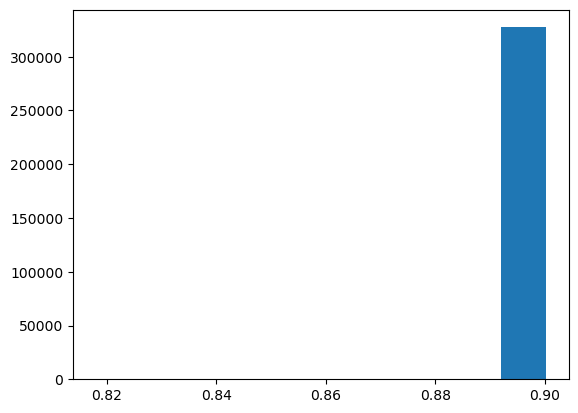

In [26]:
import jax
import jax.numpy as jnp
from jax import random, grad
import jax.nn as jnn
import jax.lax
from flax import linen as nn
import optax

class GalaxyNN(nn.Module):
    features: int  # Número de neuronas en las capas ocultas

    @nn.compact
    def __call__(self, x):
        for i in range(N_hidden_layers):
            x = nn.Dense(self.features)(x)
            x = nn.relu(x)
        x = nn.Dense(1)(x)  # Una salida por galaxia
        return _sigmoid(x, x0=0.1, k=2.0, ymin=0.0, ymax=2.0)

N_hidden_layers=1
N_neurons=1
Steps=100
Learning_rate=0.001

data = data_list
model = GalaxyNN(features=N_neurons)
rng = random.PRNGKey(0)
rng, init_rng = random.split(rng)
params = model.init(init_rng, data)  # Inicializar parámetros
predicted_weights = model.apply(params, data).squeeze()
plt.hist(predicted_weights)

In [27]:
import jax
import jax.numpy as jnp
from jax import random, grad
import jax.nn as jnn
import jax.lax
from flax import linen as nn
import optax

# 1. Definir la red neuronal
class GalaxyNN(nn.Module):
    features: int  # Número de neuronas en las capas ocultas

    @nn.compact
    def __call__(self, x):
        for i in range(N_hidden_layers):
            x = nn.Dense(self.features)(x)
            x = nn.relu(x)
        x = nn.Dense(1)(x)  # Una salida por galaxia
        epsilon = 1e-6
        #x = epsilon + (2 - 2 * epsilon) * jnn.sigmoid(x)
        return _sigmoid(x, x0=0.1, k=2.0, ymin=0.0, ymax=10.0)

# 2. Definir la densidad y la función de pérdida
def galaxy_density(weights, area):
    return jnp.sum(weights) / area  # Escalar: densidad calculada

def Delt(weights, area, DensityT):
    return((galaxy_density(weights, area))/DensityT-1)

def loss_fn(params, model, data, area, Group, Terc):
    def true_branch(Weights, area_, DensityT):
        return jnp.array([0.0])
    def false_branch(Weights, area_, DensityT):
        return jnp.array([jnp.square(Delt(Weights, area_, DensityT))])
        
    weights = model.apply(params, data).squeeze()  # Calcula los pesos
    
    AreaT=jnp.sum(area)
    DensityT=galaxy_density(weights, AreaT)
    TPdensity = jnp.array([])

    for v in range(SJ):
        density = jnp.array([])  # Inicializar como un array vacío de una sola dimensión
        mask2 = Terc == v  # Máscara booleana
        DensityT=galaxy_density(weights * mask2, AreaT)
        for i in range(JoyDiv):
            mask = Group == i  # Máscara booleana            
            Weights = weights * mask * mask2
        
            current_density = jax.lax.cond(area[i]==0, true_branch, false_branch, Weights, area[i], DensityT)
            #current_density = jnp.array([jnp.square(Delt(Weights, area[i], DensityT))])
            #current_density = jnp.where(jnp.isfinite(current_density), current_density, jnp.zeros_like(current_density))
            density = jnp.concatenate([density, current_density])  # Concatenar a density
            #print(current_density)            
        TPdensity = jnp.concatenate([TPdensity, jnp.array([jnp.nansum(density)])])

    weight_penalty = jnp.mean(jnp.square(weights - 1))  # Penalizar desviaciones de 1
    #weight_penalty = jnp.mean(-_sigmoid(weights, (0.2), 30, 0, 10)+_sigmoid(weights, (9.8), 30, 0, 10)+10)
    #weight_penalty = 0  # No penalizar desviaciones de 1
    return jnp.nansum(TPdensity) + weight_penalty

# 3. Entrenamiento
def train(model, data, area, rng, Group, Terc, steps=1000, learning_rate=0.001):
    def true_cond(B_loss,B_params,loss,params):
        return params,loss
    def false_cond(B_loss,B_params,loss,params):
        return B_params,B_loss
        
    rng, init_rng = random.split(rng)
    params = model.init(init_rng, data)  # Inicializar parámetros

    # Configurar Optax
    opt = optax.adam(learning_rate)
    opt_state = opt.init(params)
    
    losses = []  # Lista para almacenar los valores de la pérdida

    @jax.jit
    def step(params, opt_state):
        # Calcular el gradiente
        loss, grads = jax.value_and_grad(loss_fn)(params, model, data, area, Group, Terc)
        # Obtener las actualizaciones
        updates, opt_state = opt.update(grads, opt_state, params)
        # Aplicar las actualizaciones
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss

    # Bucle de entrenamiento
    for _ in range(steps):
        params, opt_state, loss = step(params, opt_state)
        #print(loss)
        losses.append(loss)

        B_params=params
        B_loss=loss

        B_params,B_loss = jax.lax.cond(B_loss>loss, true_cond, false_cond, B_loss, B_params, loss, params)

    return B_params, losses, B_loss

In [28]:
Steps=10000
Gr_N_hidden_layers=[5]
Gr_N_neurons=[312]
Gr_Learning_rate=[0.0001]

Config:  5   312   0.0001


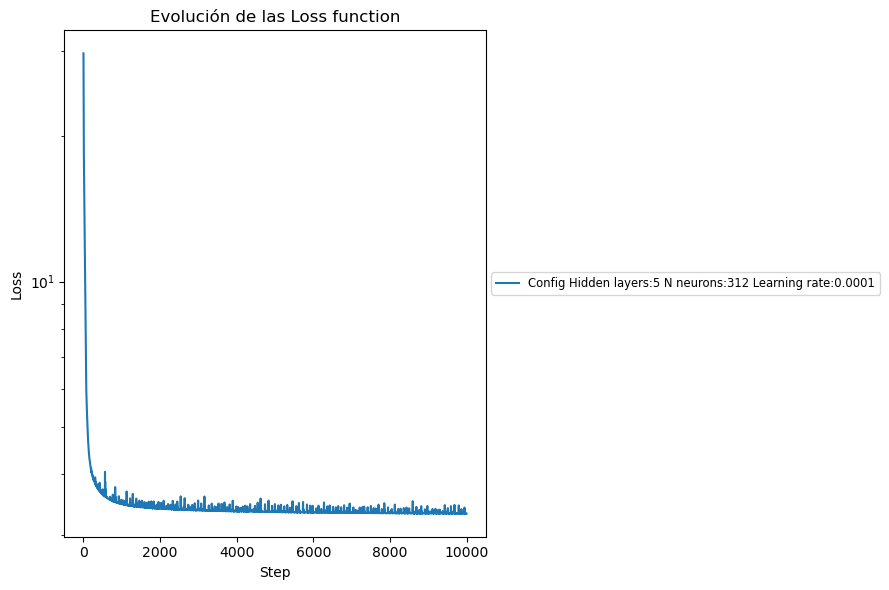

In [29]:
data = data_list
Ngal, Nmed = len(data_list), len(data_list[0])
rng = random.PRNGKey(0)
area = Dens 
Group=jnp.array(MagicianRed['Group'].astype(float))
Terc=jnp.array(MagicianRed['Terciles'].astype(float))
Losses=[]
PW=[]

plt.figure(figsize=(12, 6))
for N_hidden_layers in Gr_N_hidden_layers:
    for N_neurons in Gr_N_neurons:
        for Learning_rate in Gr_Learning_rate:
            print("Config: ",N_hidden_layers," ",N_neurons," ",Learning_rate)
            model = GalaxyNN(features=N_neurons)
            params, losses, B_loss = train(model, data, area, rng, Group, Terc, Steps, Learning_rate)
            predicted_weights = model.apply(params, data).squeeze()
            Losses.append(losses)
            PW.append(predicted_weights)
            plt.plot(losses, label=f"Config Hidden layers:{N_hidden_layers} N neurons:{N_neurons} Learning rate:{Learning_rate}") 
            
plt.xlabel("Step")
plt.ylabel("Loss")
plt.yscale('log')
plt.title("Evolución de las Loss function")
plt.legend(
    fontsize='small',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.savefig("loss_function_configs.png", dpi=300, bbox_inches='tight')
plt.show()
            

In [30]:
LossesM=np.array([np.min(Losses[i]) for i in range((len(Gr_N_hidden_layers))*(len(Gr_N_neurons))*(len(Gr_Learning_rate)))])

In [31]:
del data_list
del Dens
del predicted_weights

In [32]:
Min=1000
for i in range((len(Gr_N_hidden_layers))*(len(Gr_N_neurons))*(len(Gr_Learning_rate))):
    if Min>LossesM[i]:
        Min=LossesM[i]
        Compos=i

print("\t The best Config is:\n \n \t Hidden layers:",   Gr_N_hidden_layers[((Compos//len(Gr_Learning_rate))//len(Gr_N_neurons))%len(Gr_N_hidden_layers)],"\n \t N neurons: ",Gr_N_neurons[(Compos//len(Gr_Learning_rate))%len(Gr_N_neurons)],"\n \t Learning rate: ",Gr_Learning_rate[Compos%len(Gr_Learning_rate)],"\n")

	 The best Config is:
 
 	 Hidden layers: 5 
 	 N neurons:  312 
 	 Learning rate:  0.0001 



In [33]:
Max=-1
for i in range((len(Gr_N_hidden_layers))*(len(Gr_N_neurons))*(len(Gr_Learning_rate))):
    if Max<LossesM[i]:
        Max=LossesM[i]
        Compos2=i

print("\t The worst Config is:\n \n \t Hidden layers:",   Gr_N_hidden_layers[((Compos2//len(Gr_Learning_rate))//len(Gr_N_neurons))%len(Gr_N_hidden_layers)],"\n \t N neurons: ",Gr_N_neurons[(Compos2//len(Gr_Learning_rate))%len(Gr_N_neurons)],"\n \t Learning rate: ",Gr_Learning_rate[Compos2%len(Gr_Learning_rate)],"\n")

	 The worst Config is:
 
 	 Hidden layers: 5 
 	 N neurons:  312 
 	 Learning rate:  0.0001 



In [34]:
del LossesM

(array([7.84000e+02, 6.18100e+04, 1.63631e+05, 7.51670e+04, 1.75850e+04,
        4.30000e+03, 1.51400e+03, 7.67000e+02, 4.28000e+02, 2.66000e+02,
        1.77000e+02, 1.29000e+02, 9.90000e+01, 6.20000e+01, 5.80000e+01,
        4.20000e+01, 4.10000e+01, 3.50000e+01, 3.30000e+01, 3.50000e+01,
        1.80000e+01, 2.00000e+01, 2.10000e+01, 2.60000e+01, 1.70000e+01,
        1.20000e+01, 1.30000e+01, 7.00000e+00, 4.00000e+00, 5.00000e+00,
        2.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 1.20000e+01, 2.49000e+02]),
 array([ 0.02903089,  0.22845027,  0.42786965,  0.62728906,  0.82670844,
         1.02612782,  1.22554719,  1.42496657,  1.62438595,  1.82380533,
         2.02322459,  2.22264385,  2.42206335,  2.62148285,  2.82090211,
         3.02032137,  3.21974087,  3.41916037,  3

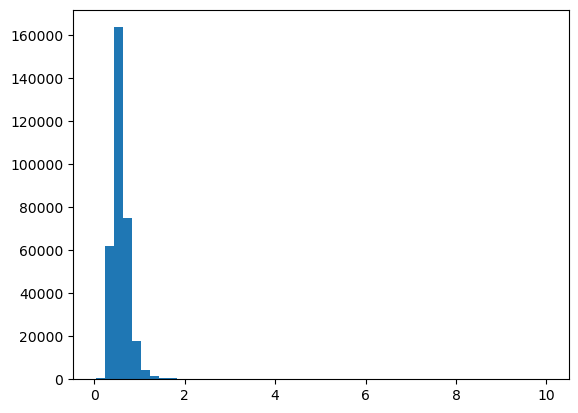

In [35]:
plt.hist(PW[Compos],50)

In [36]:
density = jnp.array([])  # Inicializar como un array vacío de una sola dimensión
AreaT = jnp.sum(area)
DensityT=galaxy_density(PW[Compos], AreaT)
    
for i in range(JoyDiv):
    group_mask = jnp.equal(Group, i)  # Devuelve un array booleano
    indices = jnp.where(group_mask)[0]  # Convierte a índices concretos utilizando where
    Weights = PW[Compos][indices]  # Filtra los pesos usando los índices
        
    #current_density = jnp.array([jnp.square(Delt(Weights, Dens[i], predicted_weights, AreaT))]) 
    current_density = jnp.array([(Delt(Weights, area[i], DensityT))]) 
    density = jnp.concatenate([density, current_density])  # Concatenar a density

del DensityT
del AreaT

In [37]:
print((density))
delta=density

[ 2.6416779e-04  6.1905384e-04  1.5823841e-03  1.0802746e-03
  1.7006397e-03 -2.7292967e-04 -5.6447983e-03 -2.5272965e-03
 -1.8492341e-03  1.8750429e-03 -1.7846823e-03  4.8829317e-03
 -1.5008450e-03  1.1389256e-03  2.5658607e-03 -8.5103512e-04
 -3.2894015e-03  8.4638596e-06  3.2473803e-03  8.2242489e-04
  8.1849098e-04  6.1281919e-03  5.1820278e-04 -1.3572574e-03
 -3.6627054e-04  5.4672956e-03 -8.7606907e-04 -1.3886094e-03
  2.2615194e-03  1.9470453e-03  2.6514530e-03  5.1230192e-03
  9.8192692e-04  2.0134449e-04 -2.6077032e-04 -2.1108389e-03
 -8.1098080e-04 -1.1653304e-03 -1.9192696e-05  2.1073818e-03
  1.3551712e-03  1.3709068e-05  1.3859272e-03  5.6040287e-04
 -9.2452765e-03  1.7694235e-03 -1.0582805e-03 -8.2910061e-04
  1.2946129e-03 -1.5892982e-03  1.0604858e-03 -2.4759769e-04
 -2.6397109e-03 -5.9866905e-04  4.3902397e-03  1.7488003e-04
 -1.7898679e-03 -1.0307431e-03 -1.7423034e-03  6.8211555e-04
 -7.3198140e-01  1.9053221e-03 -7.9929829e-05 -4.0757656e-04
  1.5387535e-03 -3.24665

In [38]:
for i in range((len(Gr_N_hidden_layers))*(len(Gr_N_neurons))*(len(Gr_Learning_rate))):
    if np.isnan(PW[i]).any():
        print("El array ",i," contiene NaN.")

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., 96.]),
 array([-0.7319814 , -0.71721923, -0.70245701, -0.68769485, -0.67293262,
        -0.65817046, -0.64340824, -0.62864608, -0.61388385, -0.59912169,
        -0.58435947, -0.5695973 , -0.55483508, -0.54007292, -0.5253107 ,
        -0.51054853, -0.49578631, -0.48102415, -0.46626195, -0.45149976,
        -0.43673757, -0.42197537, -0.40721318, -0.39245099, -0.3776888 ,
        -0.3629266 , -0.34816441, -0.33340222, -0.31864002, -0.30387783,
        -0.28911564, -0.27435344, -0.25959125, -0.24482906, -0.2300669 ,
        -0.21530467, -0.20054251, -0.18578029, -0.17101812, -0.1562559 ,
        -0.14149374, -0.12673151, -0.11196935, -0.09720713, -0.08244497,
        -0.06768274, -0.05292058, -0.03815836, -0.02339619,

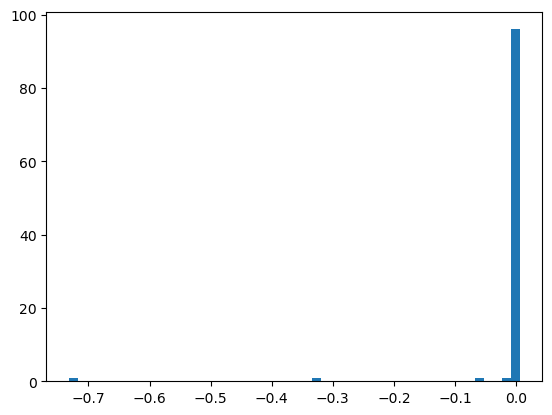

In [39]:
plt.hist(density,50)

In [40]:
cat = pd.read_parquet("property_maps_desy3Groups.parquet.gzip")

In [41]:
Clust_Area =[]
for elem in catwo.columns:
    Clust_Area.append(cat.groupby('Group_'+elem).size().reindex(range(JD), fill_value=0).values)

In [42]:
Position_in_plot = [np.loadtxt("Modulo_PosicionesFINAL.txt")[i * JD: (i + 1) * JD] for i in range(len(catwo.columns))]

In [43]:
weights = jnp.ones(len(PW[Compos]))
ClstDEN_Original=[]

for j in range(len(catwo.columns)):
    density = jnp.array([]) 
    area=Clust_Area[j]
    AreaT=jnp.sum(area)
    DensityT=galaxy_density(weights, AreaT)
    Group=jnp.array(MagicianRed['Group_'+catwo.columns[j]].astype(float))
    
    
    for i in range(JD):
        mask = Group == i  # Máscara booleana
        Weights = weights * mask
    
        current_density = jnp.array([(Delt(Weights, area[i], DensityT))])
        current_density = jnp.where(jnp.isfinite(current_density), current_density, jnp.zeros_like(current_density))
        density = jnp.concatenate([density, current_density]) 

    ClstDEN_Original.append(density)

In [44]:
weights = PW[Compos]  
ClstDEN_Corrected=[]

for j in range(len(catwo.columns)):
    density = jnp.array([])  
    area=Clust_Area[j]
    AreaT=jnp.sum(area)
    DensityT=galaxy_density(weights, AreaT)
    Group=jnp.array(MagicianRed['Group_'+catwo.columns[j]].astype(float))
    
    
    for i in range(JD):
        mask = Group == i  # Máscara booleana
        Weights = weights * mask
    
        current_density = jnp.array([(Delt(Weights, area[i], DensityT))])
        current_density = jnp.where(jnp.isfinite(current_density), current_density, jnp.zeros_like(current_density))
        density = jnp.concatenate([density, current_density])

    ClstDEN_Corrected.append(density)

In [45]:
MagicianRed['NewWeights']=PW[Compos]

In [46]:
del PW[Compos]

In [47]:
MagicianRed.to_parquet("MagicianRedFULL.parquet.gzip", engine="pyarrow", compression="gzip")

In [48]:
for i in range(len(ClstDEN_Original)):
    ClstDEN_Original[i]=ClstDEN_Original[i][ClstDEN_Original[i]!=0]
    ClstDEN_Corrected[i]=ClstDEN_Corrected[i][ClstDEN_Corrected[i]!=0]

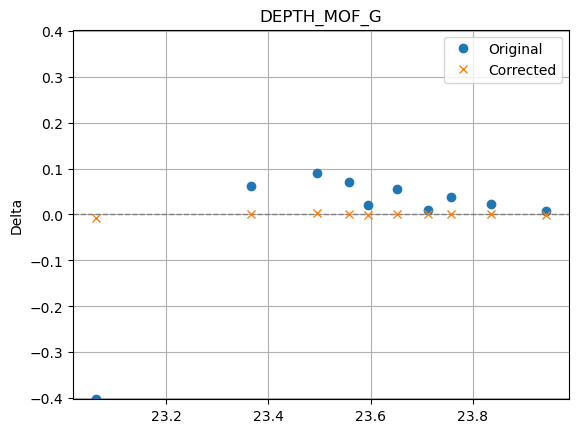

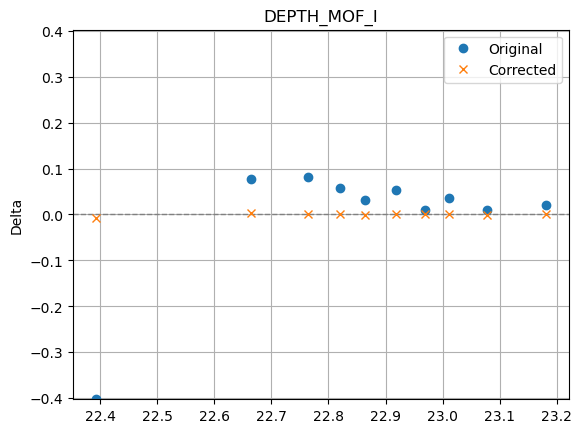

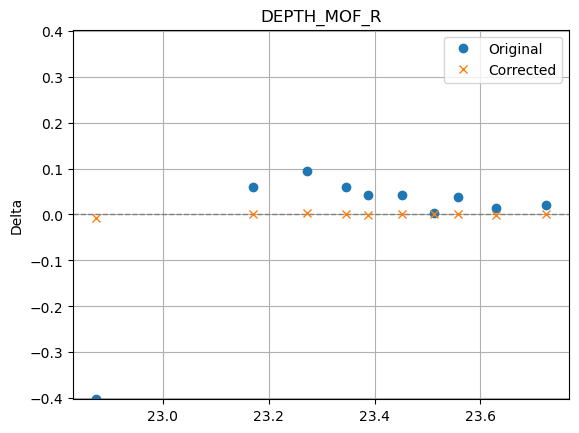

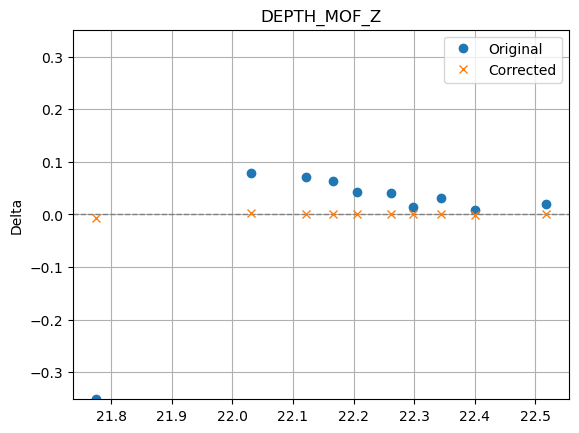

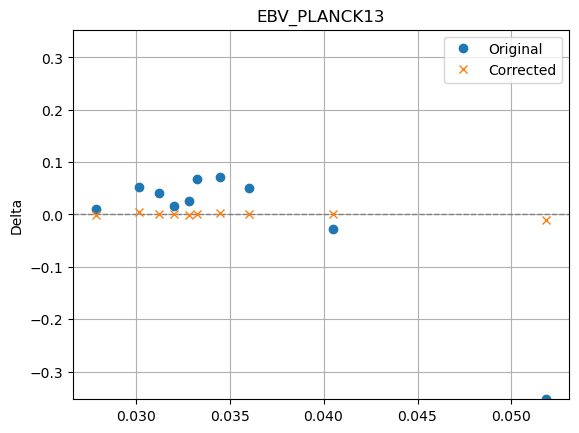

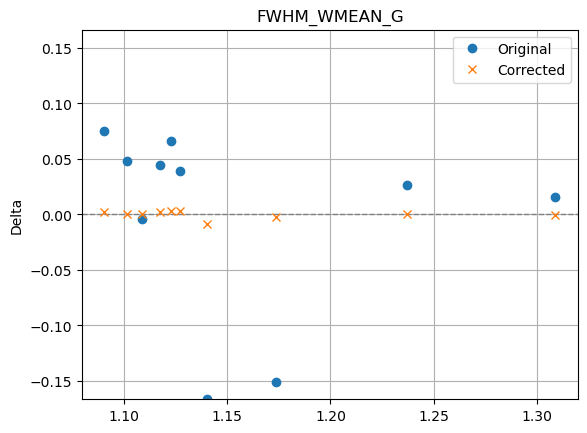

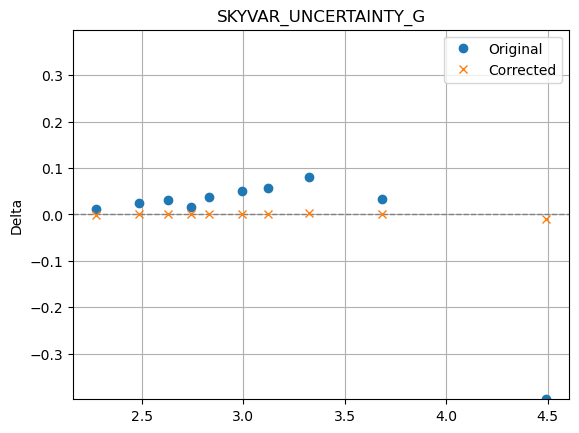

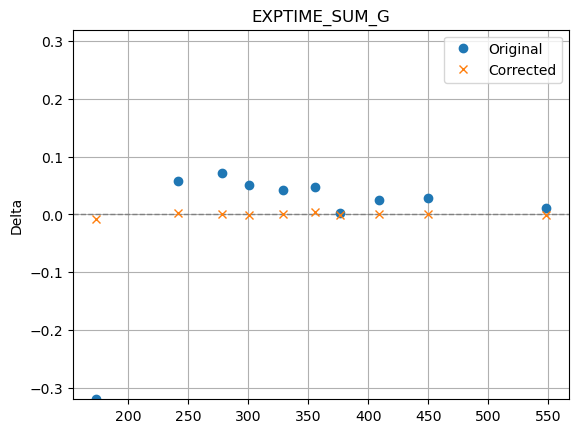

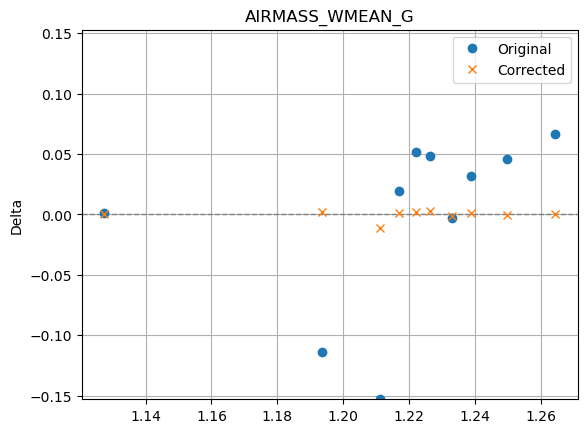

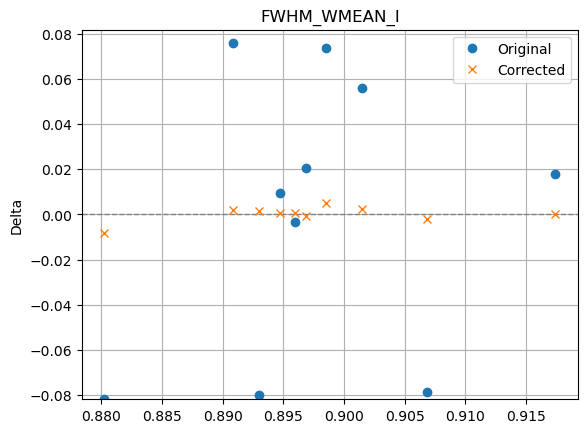

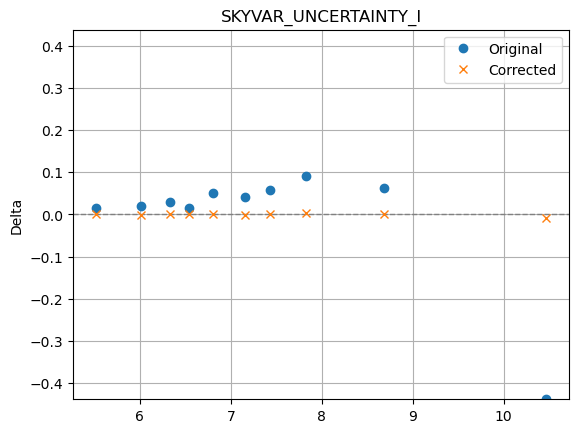

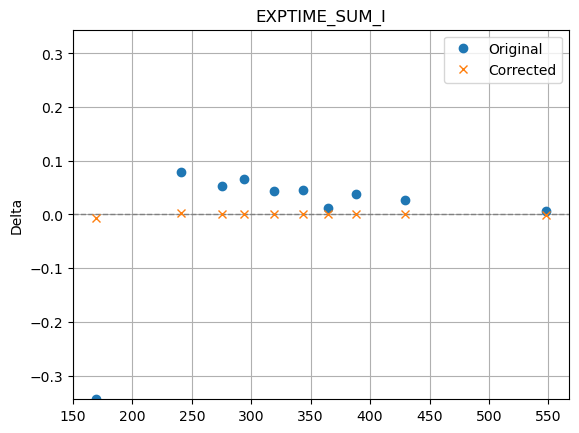

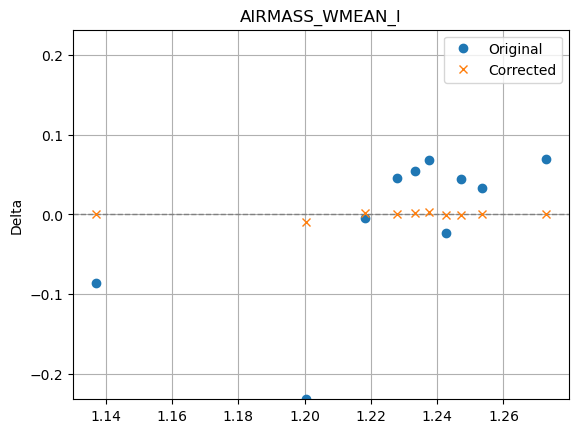

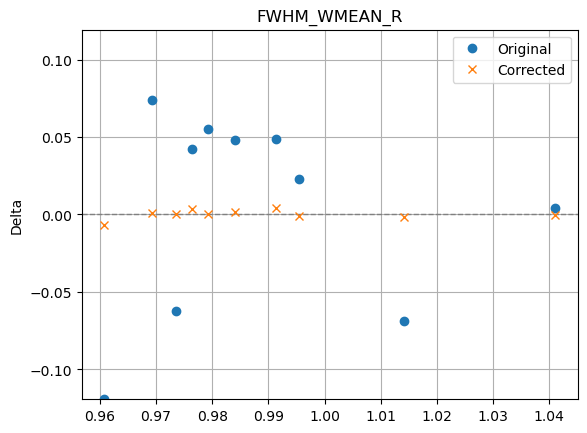

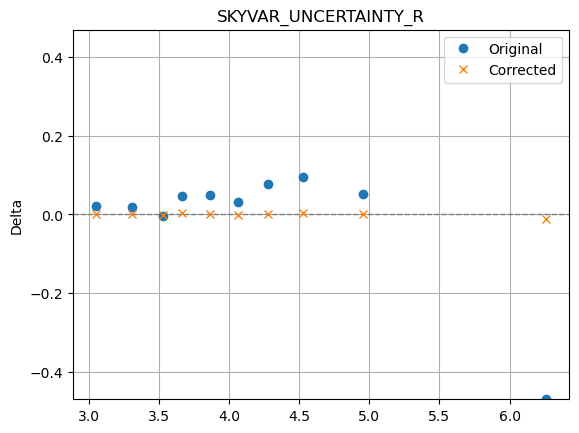

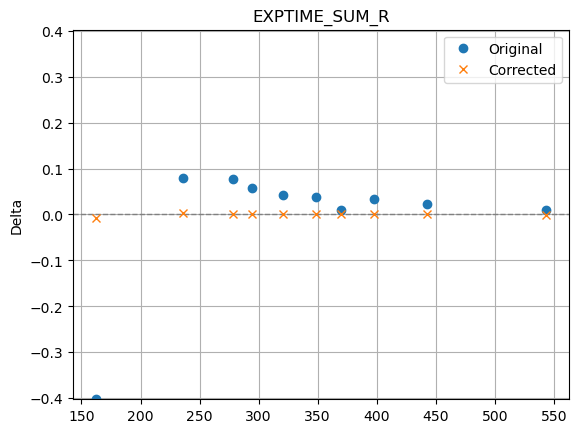

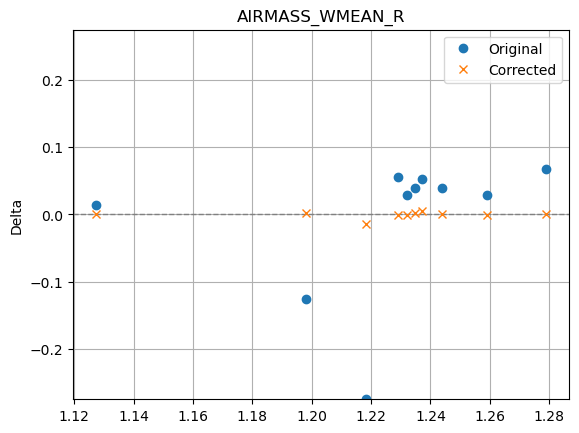

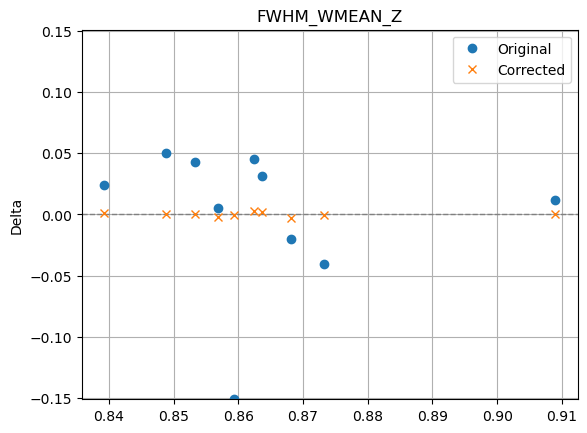

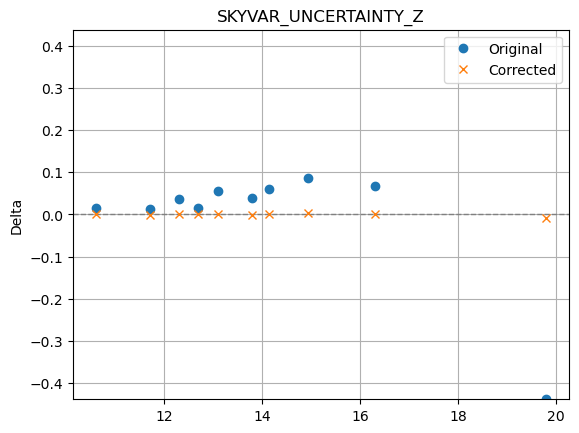

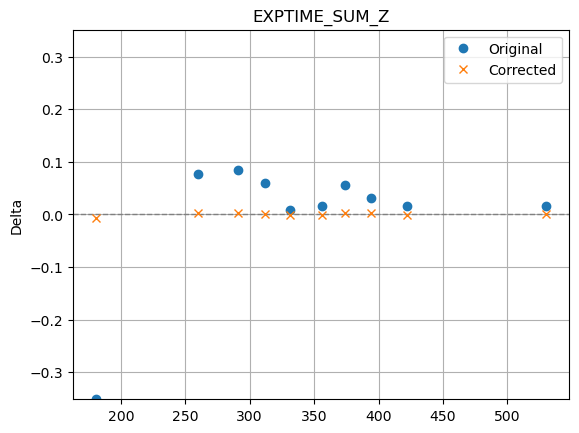

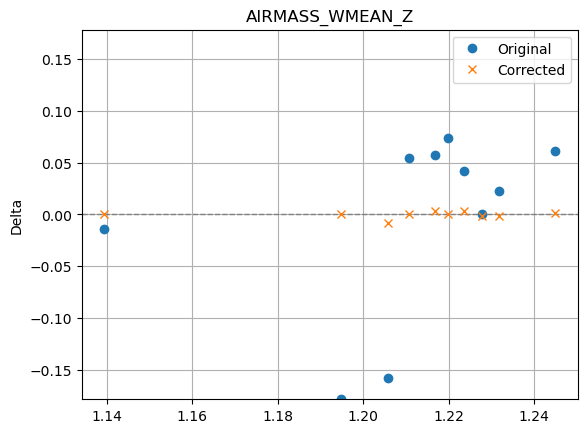

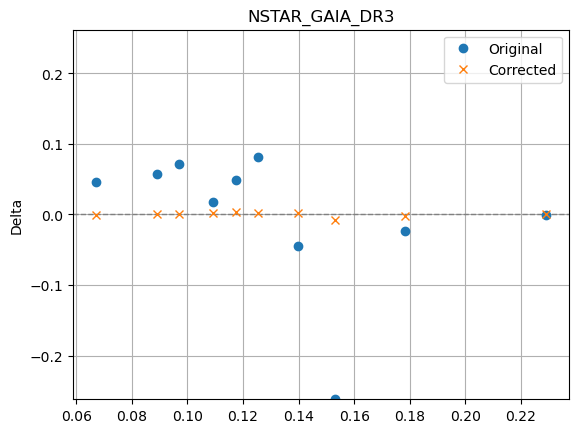

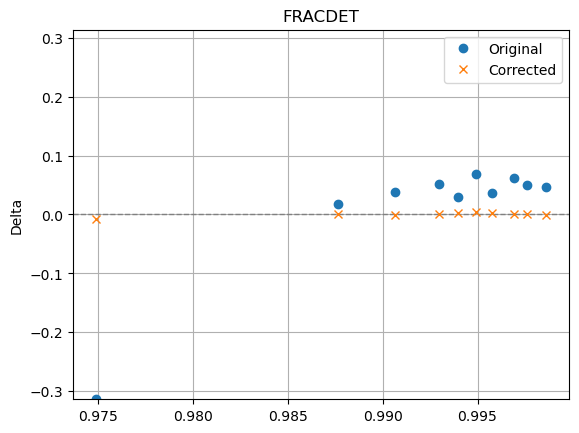

In [49]:
#output_folder = "Fits"
for i in range(len(catwo.columns)):
    Limits=max([max(abs(ClstDEN_Original[i])),max(abs(ClstDEN_Corrected[i]))])
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.plot(Position_in_plot[i],ClstDEN_Original[i], linestyle='None', marker='o', label='Original')
    plt.plot(Position_in_plot[i],ClstDEN_Corrected[i], linestyle='None', marker='x', label='Corrected')
    plt.ylim(-Limits, Limits)
    plt.ylabel('Delta')
    plt.title(catwo.columns[i])
    plt.legend()
    plt.grid()
    #filename = os.path.join(output_folder, f"plot_{catwo.columns[i]}.png")  # Combina la carpeta y el nombre del archivo
    #plt.savefig(filename, dpi=300, bbox_inches='tight')  # dpi=300 para alta calidad
    plt.show()

In [50]:
ClstDEN_Original = np.concatenate(ClstDEN_Original).tolist()
ClstDEN_Corrected = np.concatenate(ClstDEN_Corrected).tolist()

In [51]:
np.savetxt("ClstDEN_Original.txt", ClstDEN_Original, fmt="%.15f")
np.savetxt("ClstDEN_Corrected.txt", ClstDEN_Corrected, fmt="%.15f")

In [69]:
delta = np.loadtxt("delta.txt")

In [71]:
if abs(max(delta))>abs(min(delta)):
    lim=abs(max(delta))
else:
    lim=abs(min(delta))

In [72]:
delta=np.array([density[int(val)] for val in(np.loadtxt("Modulo_ClusteringBMUS.txt"))])
print(delta)

[-0.00077862 -0.00077862 -0.00077862 ... -0.00077862 -0.00077862
 -0.00077862]


In [73]:
SOM = np.loadtxt("Modulo_SOM_RESULTS.txt").reshape((som_dim+dif),som_dim,len(catwo.columns))

In [74]:
delta2=np.loadtxt("delta2.txt").reshape(((som_dim+dif), som_dim))

In [75]:
from matplotlib import cm
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

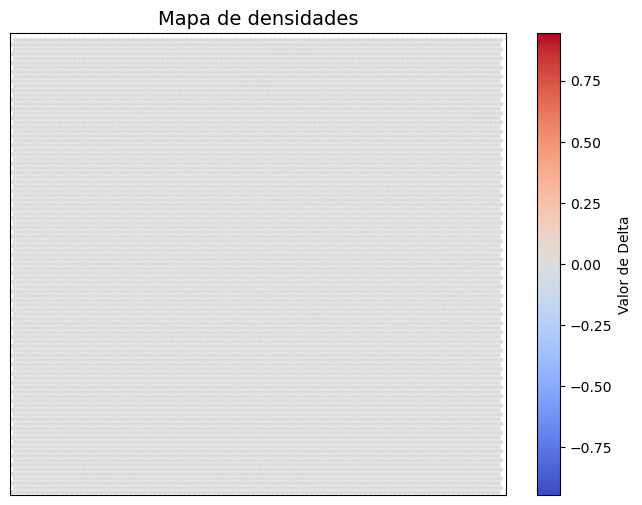

In [76]:
p_low, p_high = np.nanpercentile(delta, [5, 95])#-->La información es mas visualmente entendible
#delta3=np.clip(delta,p_low,p_high)
#delta3 = (delta3 - min(delta3)) / (max(delta3) - min(delta3)) 
delta3=np.array(delta)
C_density=delta3

if abs(max(delta))>abs(min(delta)):
    lim2=abs(max(delta))
else:
    lim2=abs(min(delta))

#delta3=delta*(lim2/lim)+1-(lim2/lim)

delta3 = delta3.reshape(SOM.shape[1], SOM.shape[0])

fig, ax = plt.subplots(figsize=(8, 6))
hex_size = 1

cmap = plt.cm.coolwarm

for i in range(delta2.shape[0]):
    for j in range(delta2.shape[1]):
        y = i * hex_size * np.sqrt(3) 
        x = j * hex_size * 3/2 + (i%2) * hex_size *  3/4 

        hexagon = RegularPolygon((x, y), numVertices=6, radius=hex_size, 
                                 orientation=np.radians(0), 
                                 facecolor=cmap((delta3[i, j] + lim) / (2 * lim)))
        ax.add_patch(hexagon)
        #ax.text(x, y, f'{delta2[i, j]*(np.max(delta) - np.min(delta))+np.min(delta):.3f}', ha='center', va='center', color='black', fontsize=8)

ax.set_xlim(-hex_size, (delta2.shape[1]) * hex_size * 3/2+1)
ax.set_ylim(-hex_size, (delta2.shape[0]) * hex_size * np.sqrt(3)+1)

ax.set_title('Mapa de densidades', fontsize=14)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-lim, vmax=lim))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Valor de Delta')

plt.xticks([])
plt.yticks([])

#filename = os.path.join("plots",f"Mapa_Densidades_ConPesosCOMP.png") 
#plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

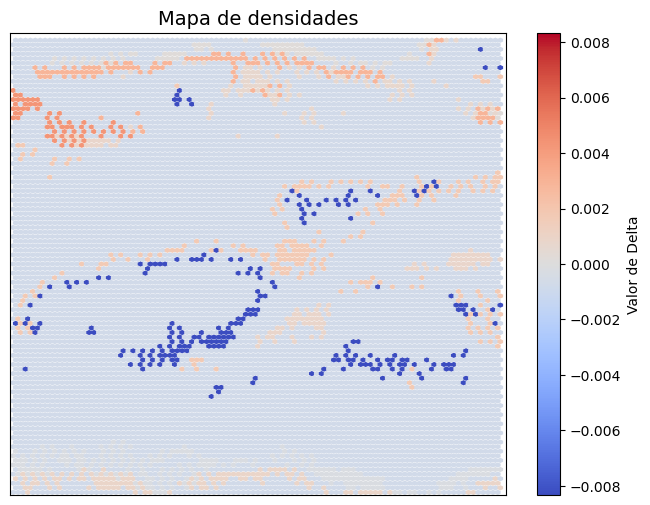

In [77]:
p_low, p_high = np.nanpercentile(delta, [5, 95])#-->La información es mas visualmente entendible
#delta3=np.clip(delta,p_low,p_high)
#delta3 = (delta3 - min(delta3)) / (max(delta3) - min(delta3))
delta3=np.array(delta)
C_density=delta3

if abs(max(delta))>abs(min(delta)):
    lim2=abs(max(delta))
else:
    lim2=abs(min(delta))

#delta3=delta*(lim2/lim)+1-(lim2/lim)

delta3 = delta3.reshape(SOM.shape[1], SOM.shape[0])

fig, ax = plt.subplots(figsize=(8, 6))
hex_size = 1

cmap = plt.cm.coolwarm

for i in range(delta2.shape[0]):
    for j in range(delta2.shape[1]):
        y = i * hex_size * np.sqrt(3) 
        x = j * hex_size * 3/2 + (i%2) * hex_size *  3/4 

        hexagon = RegularPolygon((x, y), numVertices=6, radius=hex_size, 
                                 orientation=np.radians(0), 
                                 facecolor=cmap((delta3[i, j] + lim2) / (2 * lim2)))
        ax.add_patch(hexagon)
        #ax.text(x, y, f'{delta2[i, j]*(np.max(delta) - np.min(delta))+np.min(delta):.3f}', ha='center', va='center', color='black', fontsize=8)

ax.set_xlim(-hex_size, (delta2.shape[1]) * hex_size * 3/2+1)
ax.set_ylim(-hex_size, (delta2.shape[0]) * hex_size * np.sqrt(3)+1)

ax.set_title('Mapa de densidades', fontsize=14)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-lim2, vmax=lim2))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Valor de Delta')

plt.xticks([])
plt.yticks([])

#filename = os.path.join("plots",f"Mapa_Densidades_ConPesos.png") 
#plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()